In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

In [3]:
iris = pd.read_csv("../data/IRIS.csv")
x = iris.iloc[:, [0, 1, 2, 3]].values

In [4]:
iris.info()
iris[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


c:\users\lucas\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lucas\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lucas\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

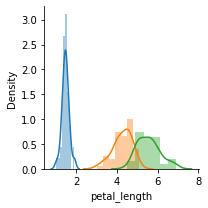

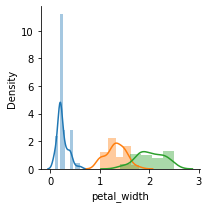

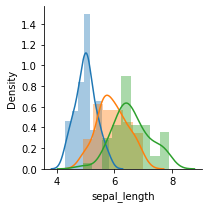

In [7]:
iris_setosa=iris.loc[iris["species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["species"]=="Iris-versicolor"]
sns.FacetGrid(iris,hue="species",height=3).map(sns.distplot,"petal_length")
sns.FacetGrid(iris,hue="species",height=3).map(sns.distplot,"petal_width")
sns.FacetGrid(iris,hue="species",height=3).map(sns.distplot,"sepal_length")
plt.show()

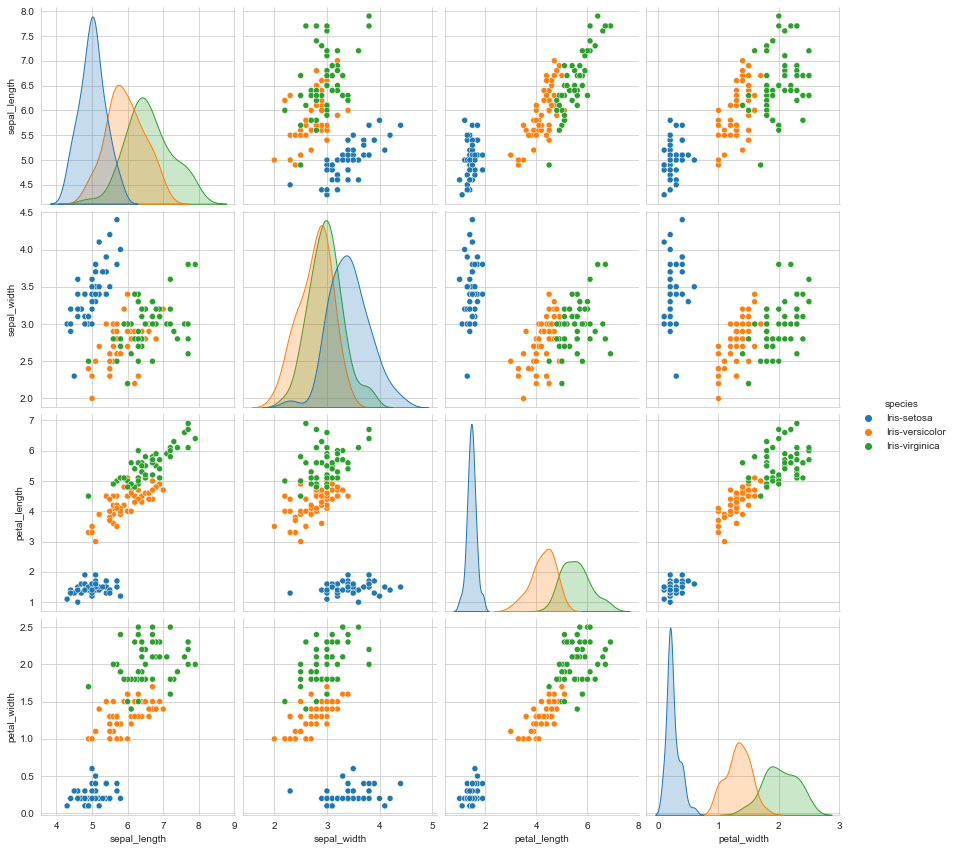

In [9]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",height=3)
plt.show()

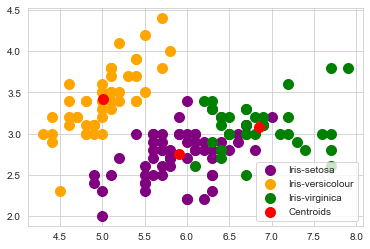

In [10]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

In [17]:
x[y_kmeans == 0, 1]

array([3.2, 3.2, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9,
       2.9, 3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8,
       2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
       3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 2.7, 2.5, 2.5, 2.8,
       2.2, 2.8, 2.7, 2.8, 3. , 2.8, 3. , 2.7, 2.5, 3. ])

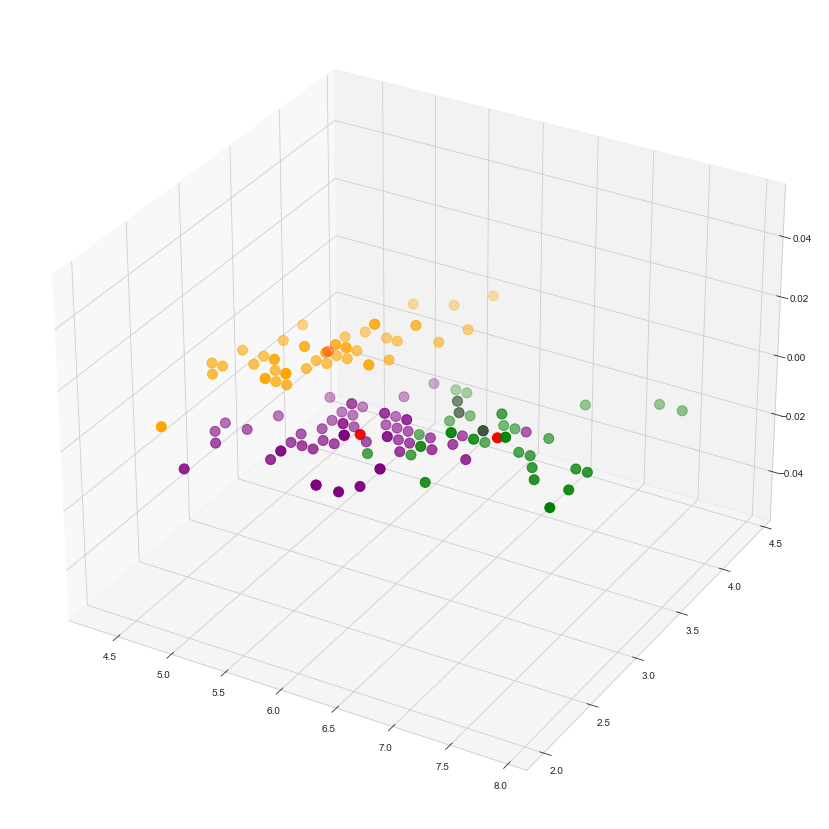

In [19]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

In [20]:
from ExKMC.Tree import Tree
from utils import calc_cost, plot_kmeans, plot_tree_boundary
kmeans.fit(x)
plot_kmeans(kmeans, x)

ModuleNotFoundError: No module named 'cut_finder'

In [ ]:
tree_1k = Tree(3)
tree_1k.fit(x, kmeans)

plot_tree_boundary(tree_1k, 3, x, kmeans, plot_mistakes=True)